# Red Pill Content Analysis and Insights

In [1]:
!pip install isodate nltk wordcloud

In [2]:
import pandas as pd
import numpy as np
import time
import isodate
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from dateutil import parser
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bashaar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/bashaar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
video_df = pd.read_csv("dataFolder/processed/cleanedDataFrame.csv")

In [5]:
df1 = pd.read_csv("dataFolder/raw/commentsBatchOne_df.csv")
df2 = pd.read_csv("dataFolder/raw/commentsBatchTwo_df.csv")

In [6]:
comments_df = pd.concat([df1, df2], ignore_index=True)

In [7]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,...,publishedAt_timestamp,tagCount,durationSecs,titleLength,view_per_like,comment_duration_interaction,popularity_score,commentRatio,likeRatio,title_sentiment
0,F5eSaabAAmk,Benjamin Seda,How to ACTUALLY Get a Girlfriend in 2025 (Full...,👉🏼 Get 1-3+ dates per week in 30 days (coachin...,"['how to flirt with a girl', 'dates', 'how to ...",2025-03-06 15:27:49+00:00,5034.0,254.0,0.0,27.0,...,1.741275e+09,21,904.0,53,19.818898,24408.0,8114.0,0.005364,0.050457,0.175000
1,xJ6b8CV-pQ0,Benjamin Seda,How to Find A 10/10 Girlfriend,👫 My 3 step formula to approach & attract wome...,"['how to flirt with a girl', 'dates', 'how to ...",2025-03-03 15:01:24+00:00,3346.0,330.0,0.0,22.0,...,1.741014e+09,13,59.0,30,10.139394,1298.0,7086.0,0.006575,0.098625,0.000000
2,kPhrei5S88U,Benjamin Seda,The Mistake 99% of Men Make That Keep Them Single,👫 My 3 step formula to approach & attract wome...,"['how to flirt with a girl', 'dates', 'how to ...",2025-03-01 14:45:07+00:00,2690.0,222.0,0.0,19.0,...,1.740840e+09,13,36.0,49,12.117117,684.0,5290.0,0.007063,0.082528,-0.071429
3,4ZnwTwLcAeM,Benjamin Seda,How to Always Get That 2nd Date,👫 My 3 step formula to approach & attract wome...,"['how to flirt with a girl', 'dates', 'how to ...",2025-02-27 14:15:00+00:00,4060.0,413.0,0.0,9.0,...,1.740666e+09,13,46.0,31,9.830508,414.0,8370.0,0.002217,0.101724,0.000000
4,VW9-SBs6yIg,Benjamin Seda,The Donald Trump Method for Tinder (STEAL THIS),👫 My 3 step formula to approach & attract wome...,"['how to flirt with a girl', 'dates', 'how to ...",2025-02-26 13:45:03+00:00,6818.0,316.0,0.0,30.0,...,1.740578e+09,13,32.0,47,21.575949,960.0,10578.0,0.004400,0.046348,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12899,KO7Z0HdxIek,FreshandFit,The Most OPTIMAL Rep Range For STRENGTH,Many people struggle to determine the best rep...,"['repetition range', 'how to lift weights', 'h...",2020-06-25 00:36:00+00:00,9633.0,601.0,0.0,21.0,...,1.593045e+09,23,258.0,39,16.028286,5418.0,16063.0,0.002180,0.062390,0.500000
12900,3LXo6A-JnV4,FreshandFit,What's better for fat loss? Low carb or high c...,Today we answer the age old question. Are high...,"['fatloss', 'lowcarb', 'weight loss', 'keto', ...",2020-06-20 14:45:11+00:00,9209.0,490.0,0.0,26.0,...,1.592664e+09,23,193.0,50,18.793878,5018.0,14629.0,0.002823,0.053209,0.220000
12901,e9Gdl-szTg4,FreshandFit,Are Fitness/Calorie Tracking Apps Accurate? Th...,Are these popular apps bringing you closer to ...,['redpill fitness hypergamy #gainz'],2020-06-13 15:00:11+00:00,4787.0,242.0,0.0,10.0,...,1.592060e+09,1,271.0,66,19.780992,2710.0,7407.0,0.002089,0.050554,-0.163889
12902,RHlPDYsuBYs,FreshandFit,IS FASTING SUPERIOR? What the science says...,Does fasting build more muscle or help burn mo...,"['fasting', 'fitness', 'aesthetic']",2020-05-30 15:00:27+00:00,23952.0,1353.0,0.0,64.0,...,1.590851e+09,3,426.0,45,17.702882,27264.0,38762.0,0.002672,0.056488,0.700000


In [8]:
comments_df

,video_id,comment,published_at
0,OVIC-6QRIGI,Men have to be 6 ft multimillionaires to get ...,2025-03-09T12:04:38Z
1,OVIC-6QRIGI,Can’t believe this pod is still on.,2025-03-09T10:58:29Z
2,OVIC-6QRIGI,YT needs to stop this censorship nonsense smh,2025-03-09T05:25:19Z
3,OVIC-6QRIGI,These long nails are so ugly….women don’t see ...,2025-03-09T04:10:56Z
4,OVIC-6QRIGI,"Wow kamala voter just a dead NPC \nSOULLESS, n...",2025-03-09T03:54:54Z
...,...,...,...
669609,cIoiNZC1K7s,Best channel ..you are love guru,2018-12-09T18:03:34Z
669610,cIoiNZC1K7s,2018??,2018-11-28T09:39:10Z
669611,cIoiNZC1K7s,Over 9000,2018-11-18T11:04:31Z
669612,cIoiNZC1K7s,Should you approach her when there's other peo...,2018-11-07T20:37:51Z


In [9]:
video_df.isnull().any()

video_id                        False
channelTitle                    False
title                           False
description                      True
tags                            False
publishedAt                     False
viewCount                       False
likeCount                       False
favouriteCount                  False
commentCount                    False
duration                        False
definition                      False
caption                         False
publishDayName                  False
publishedAt_timestamp           False
tagCount                        False
durationSecs                    False
titleLength                     False
view_per_like                   False
comment_duration_interaction    False
popularity_score                False
commentRatio                     True
likeRatio                       False
title_sentiment                 False
dtype: bool

In [10]:
video_df.publishedAt.sort_values().value_counts()

publishedAt
2021-06-03 16:15:00+00:00    2
2023-03-16 20:00:05+00:00    2
2024-02-12 15:00:04+00:00    2
2023-03-14 20:00:07+00:00    2
2022-12-27 21:00:02+00:00    2
                            ..
2021-10-28 00:43:59+00:00    1
2021-10-28 04:58:45+00:00    1
2021-10-28 14:00:17+00:00    1
2021-10-28 15:27:24+00:00    1
2025-03-07 16:00:27+00:00    1
Name: count, Length: 12881, dtype: int64

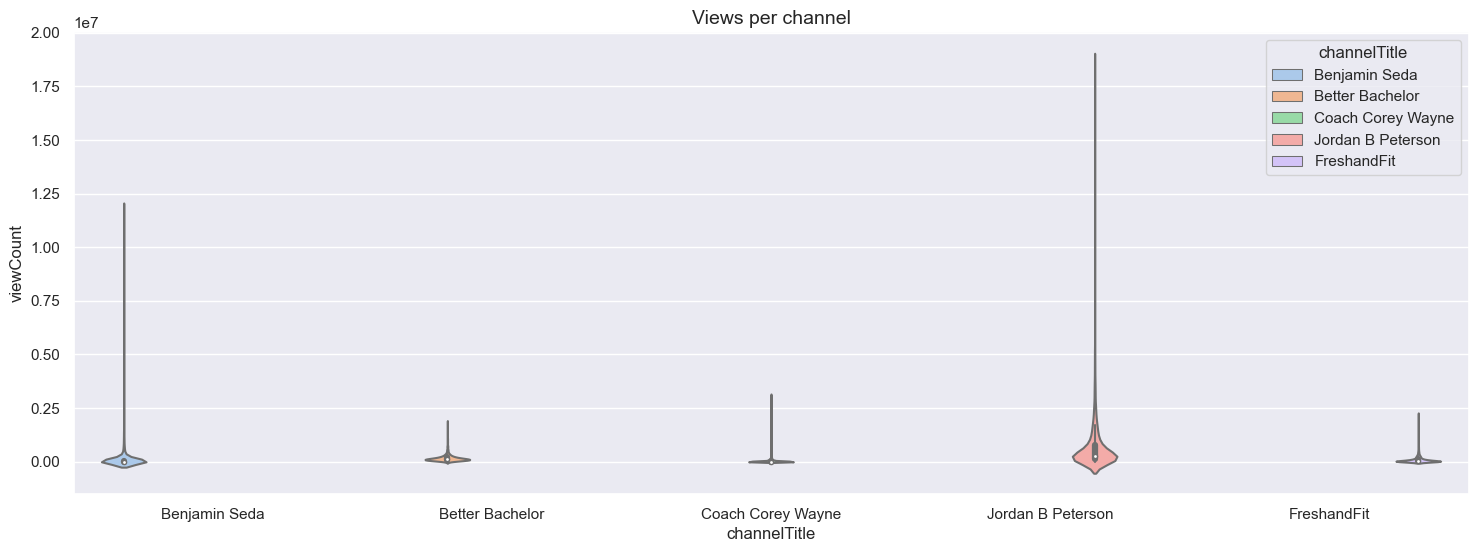

In [11]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.violinplot(x='channelTitle', y='viewCount', data=video_df, hue='channelTitle', palette='pastel', legend=False)
plt.title('Views per channel', fontsize=14)
plt.show()

<Axes: xlabel='likeCount', ylabel='viewCount'>

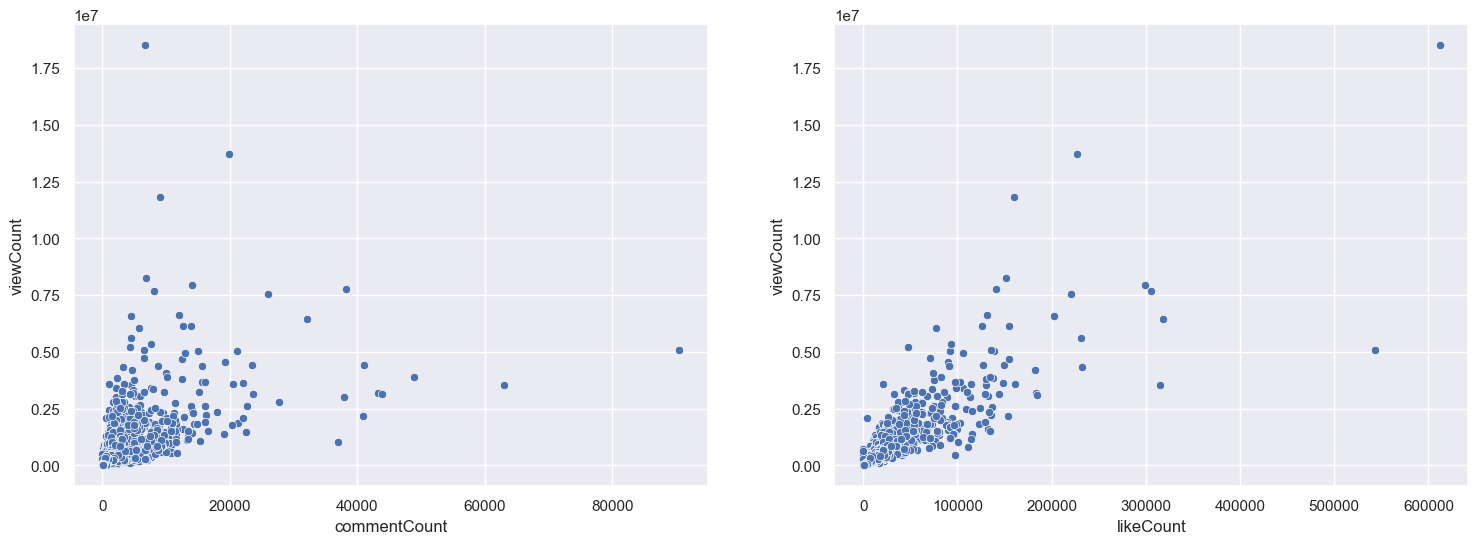

In [12]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "commentCount", y = "viewCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "likeCount", y = "viewCount", ax=ax[1])

<Axes: xlabel='likeRatio', ylabel='viewCount'>

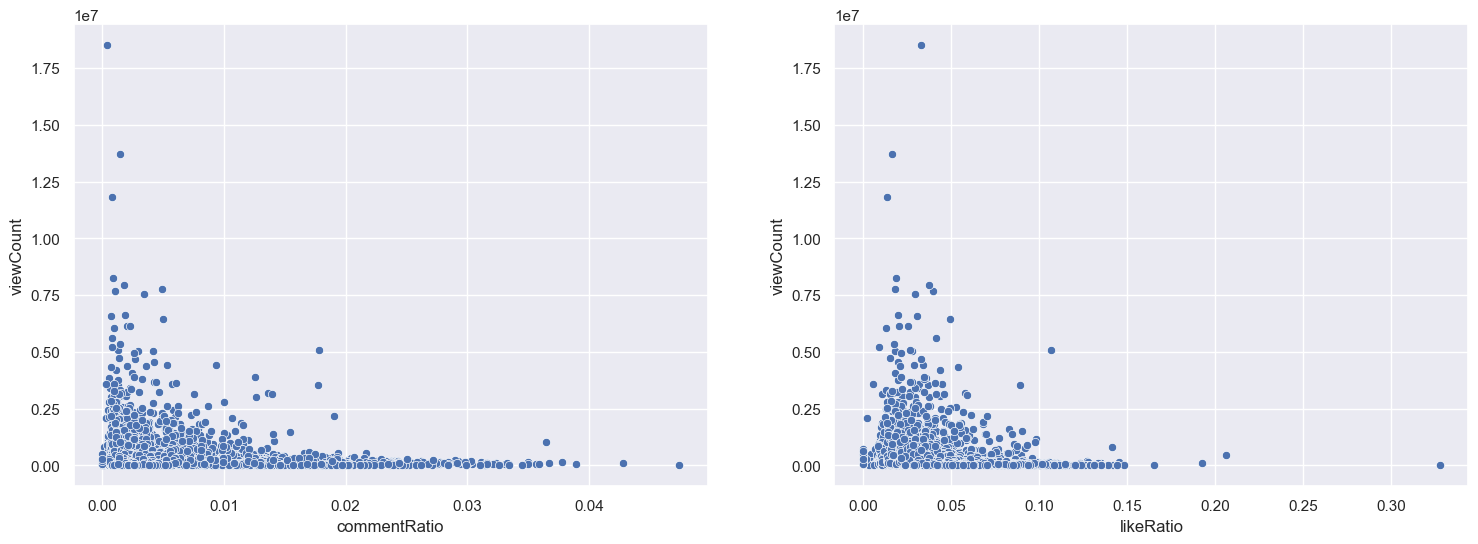

In [13]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "commentRatio", y = "viewCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "likeRatio", y = "viewCount", ax=ax[1])

/Users/bashaar/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


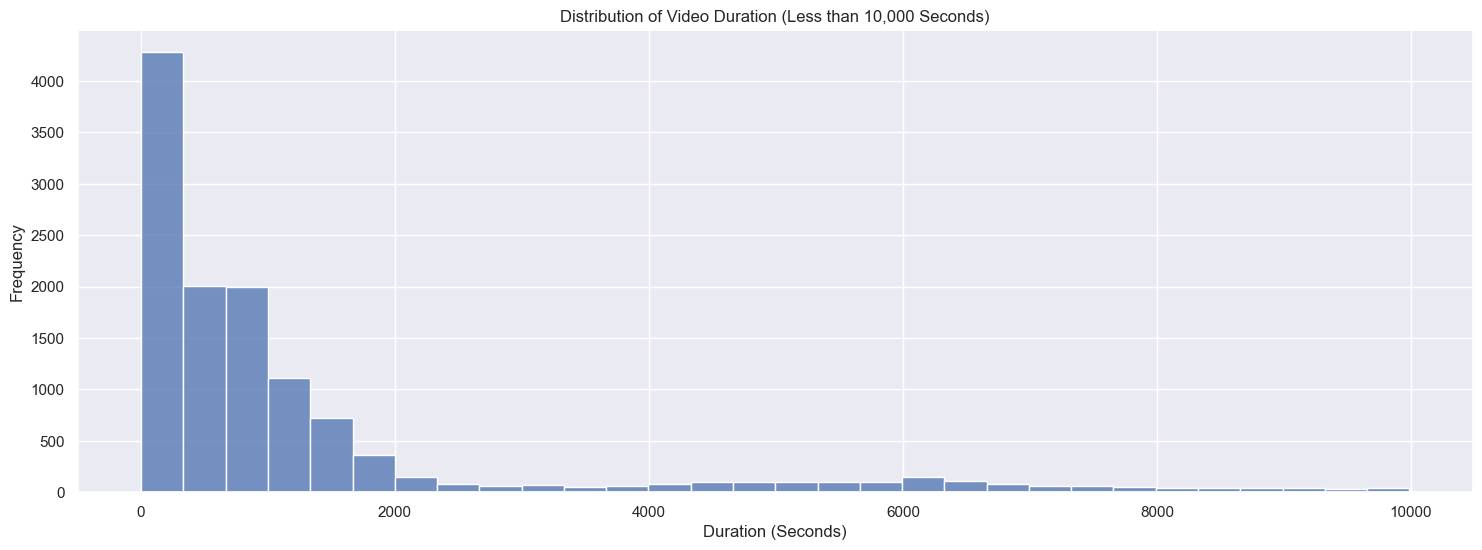

In [17]:
# Replace infinite values with NaN
video_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (optional)
video_df.dropna(inplace=True)

# Filter videos with duration less than 10,000 seconds
filtered_df = video_df[video_df['durationSecs'] < 10000]

# Plot the histogram
sns.histplot(data=filtered_df, x="durationSecs", bins=30)
plt.title("Distribution of Video Duration (Less than 10,000 Seconds)")
plt.xlabel("Duration (Seconds)")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='durationSecs', ylabel='likeCount'>

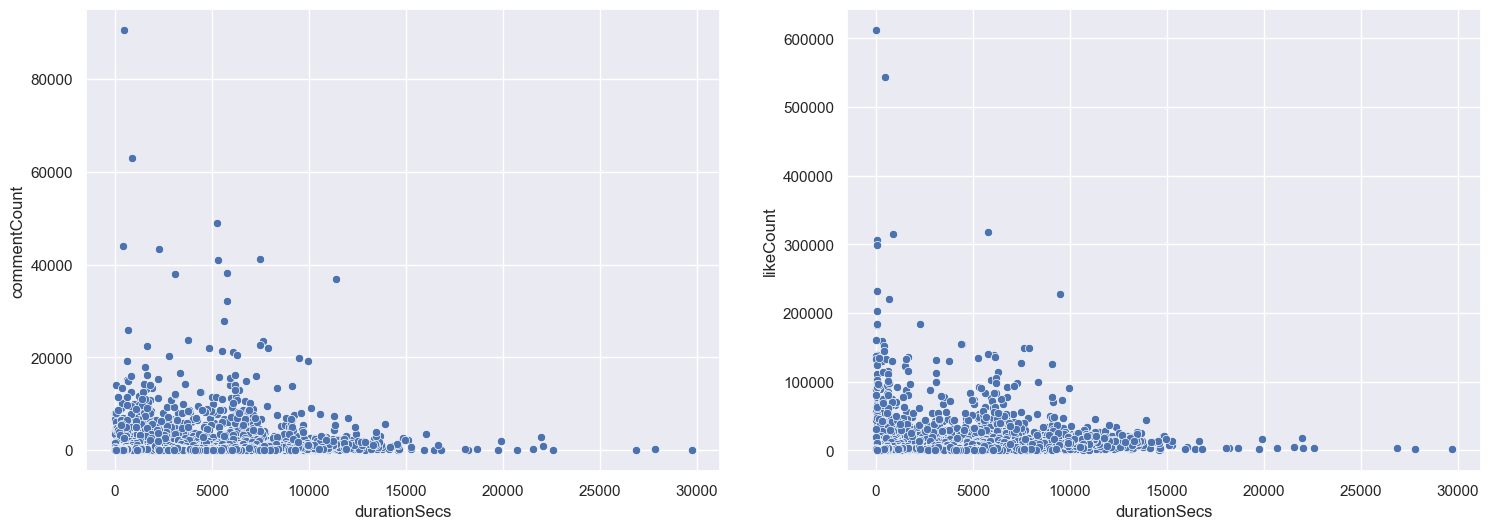

In [18]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "durationSecs", y = "commentCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "durationSecs", y = "likeCount", ax=ax[1])

<Axes: xlabel='titleLength', ylabel='viewCount'>

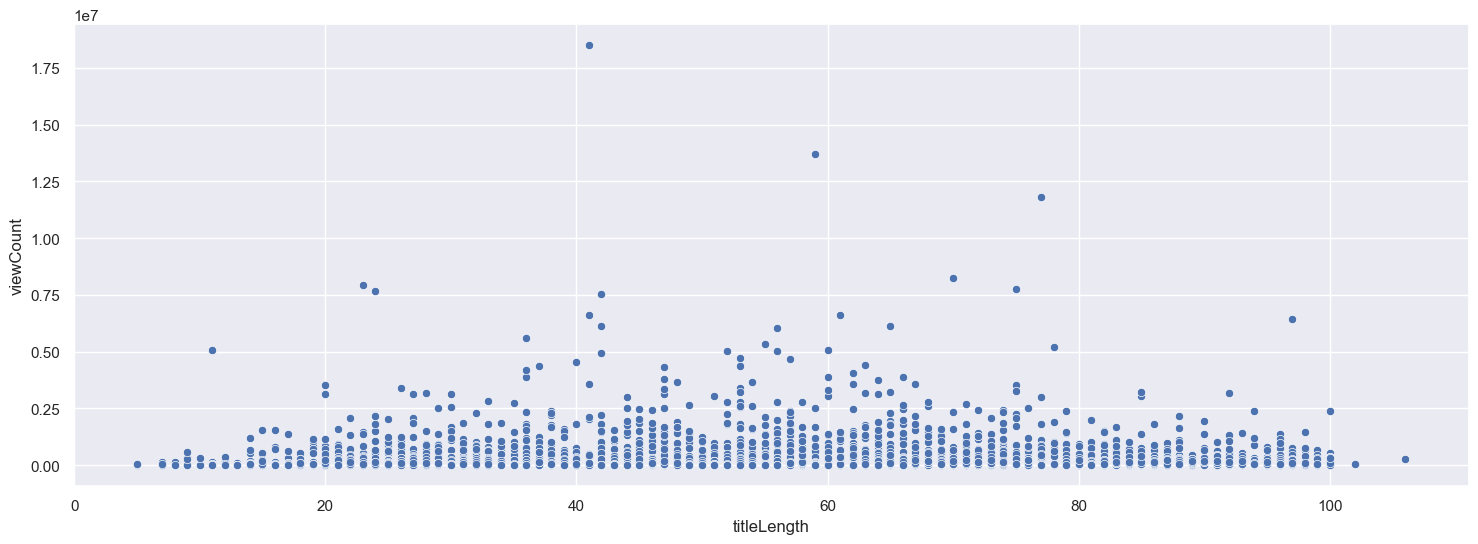

In [19]:
sns.scatterplot(data = video_df, x = "titleLength", y = "viewCount")

In [20]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

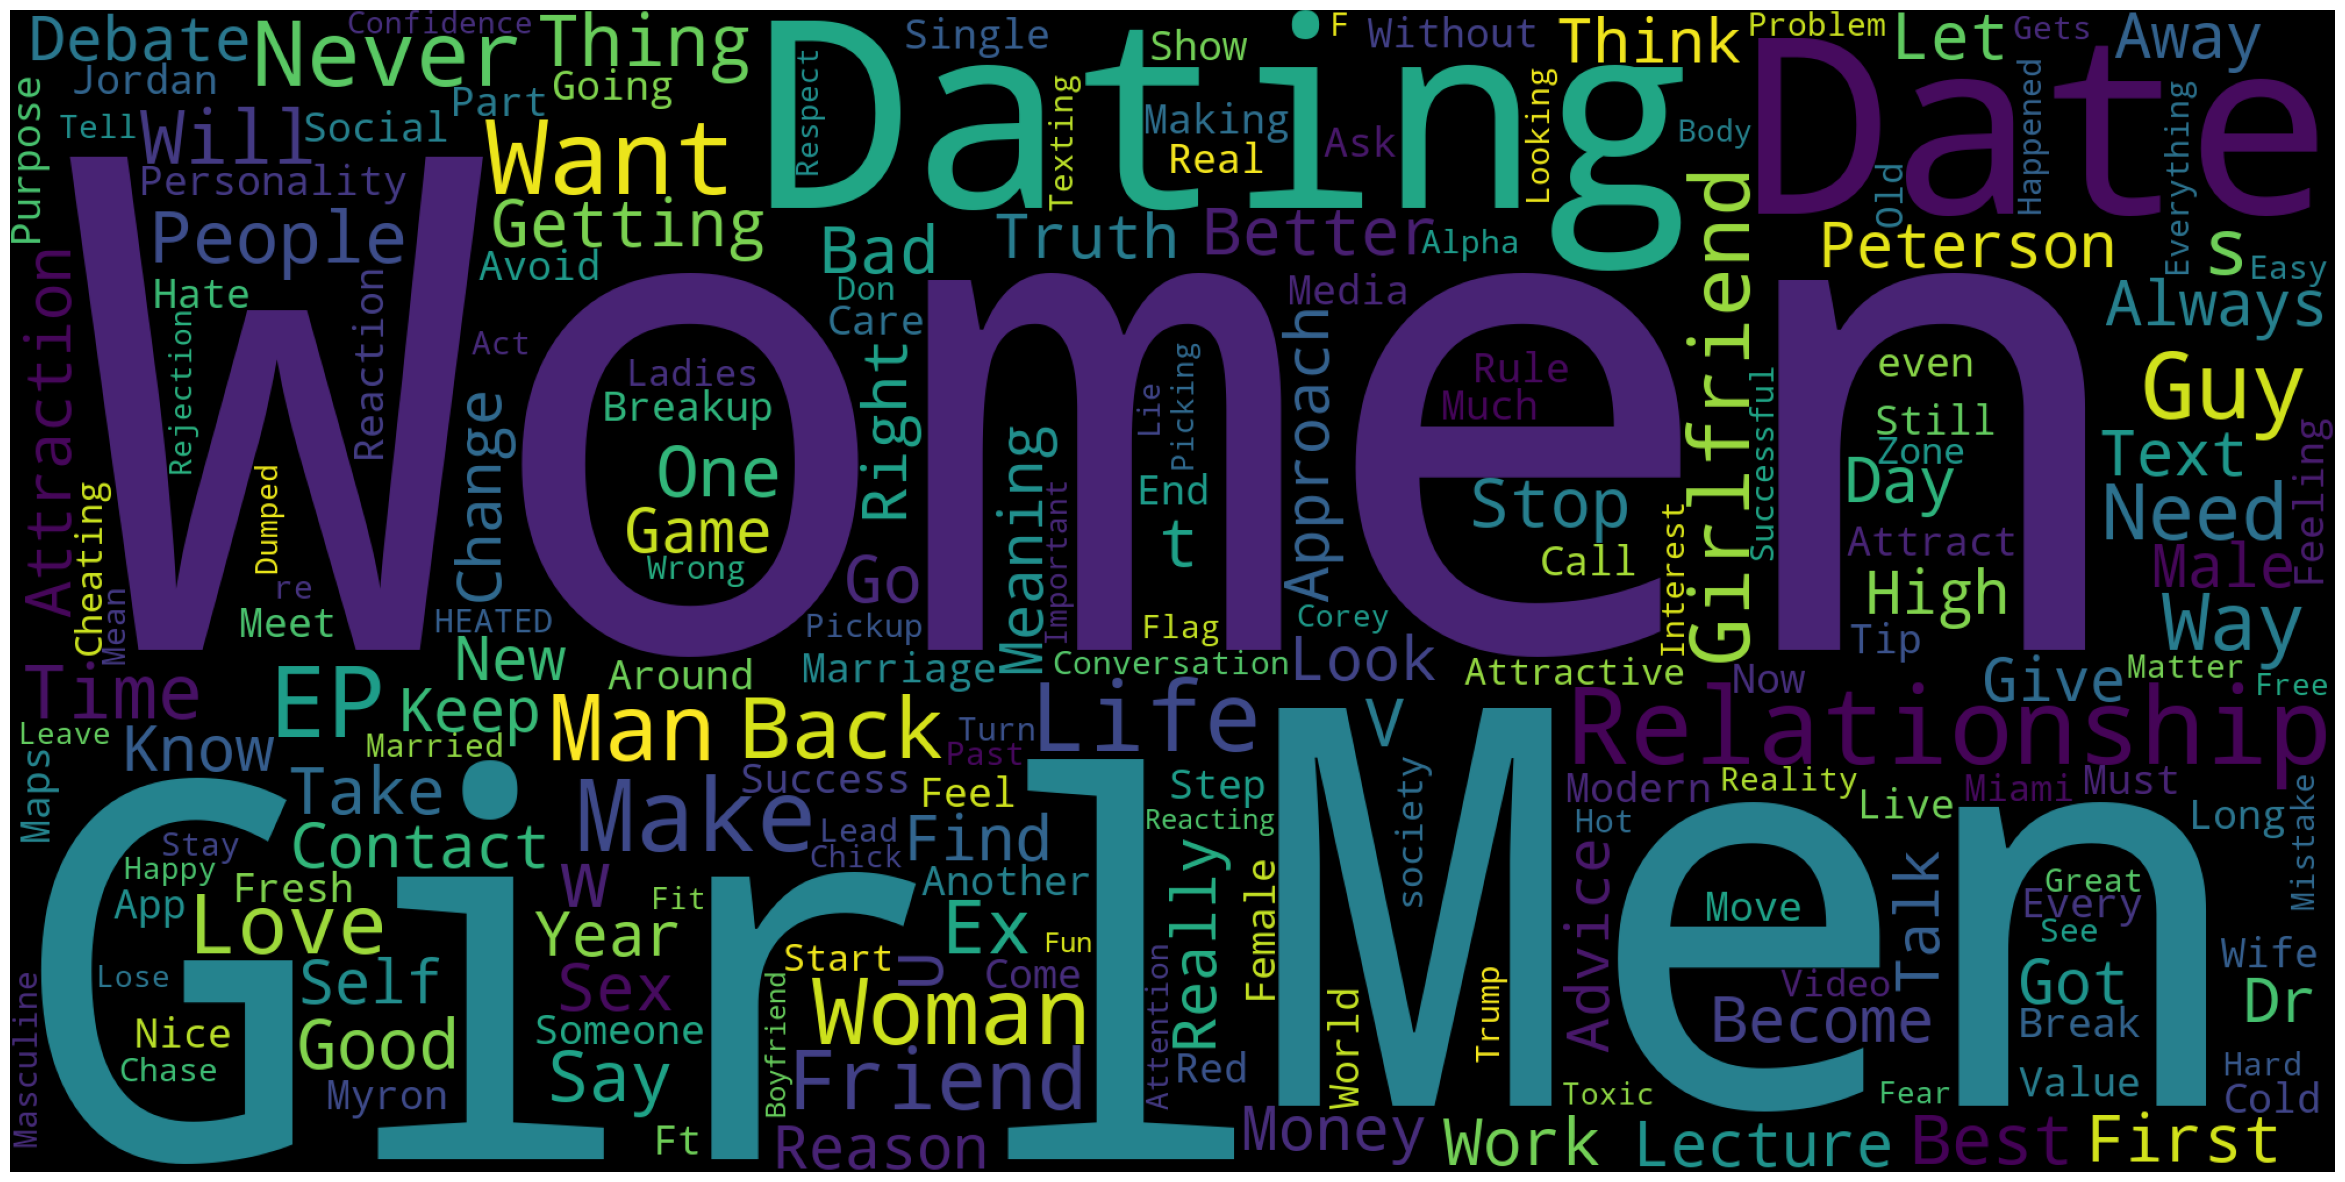

In [21]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

<Axes: xlabel='tagCount', ylabel='viewCount'>

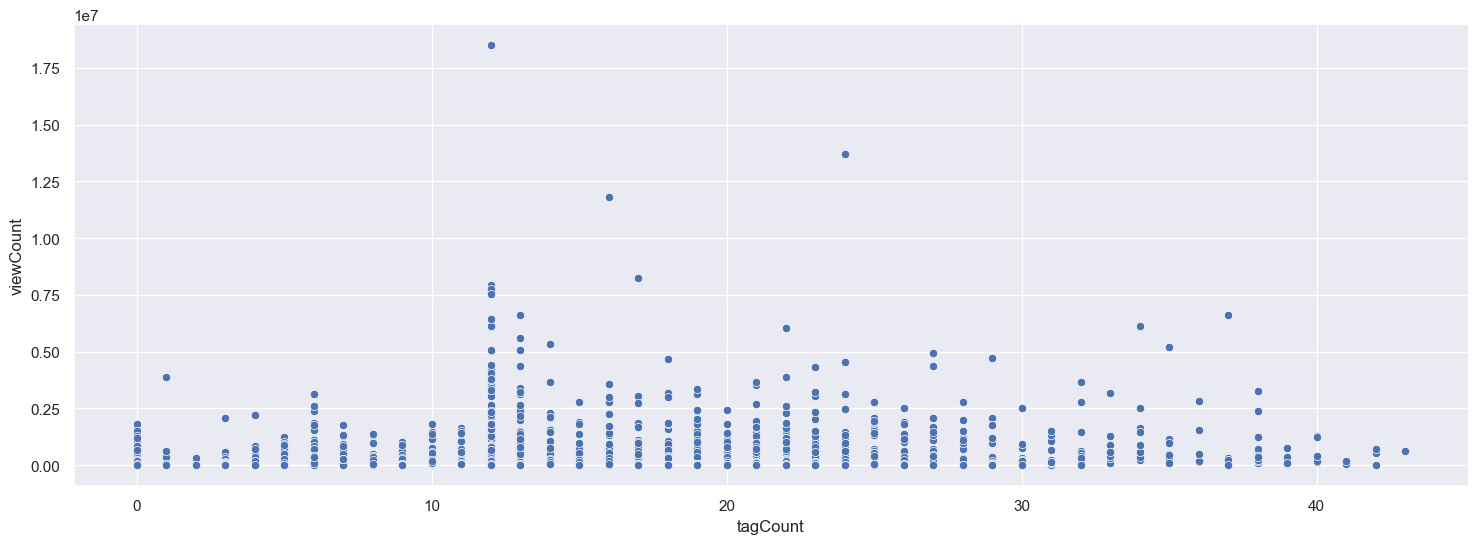

In [23]:
sns.scatterplot(data = video_df, x = "tagCount", y = "viewCount")

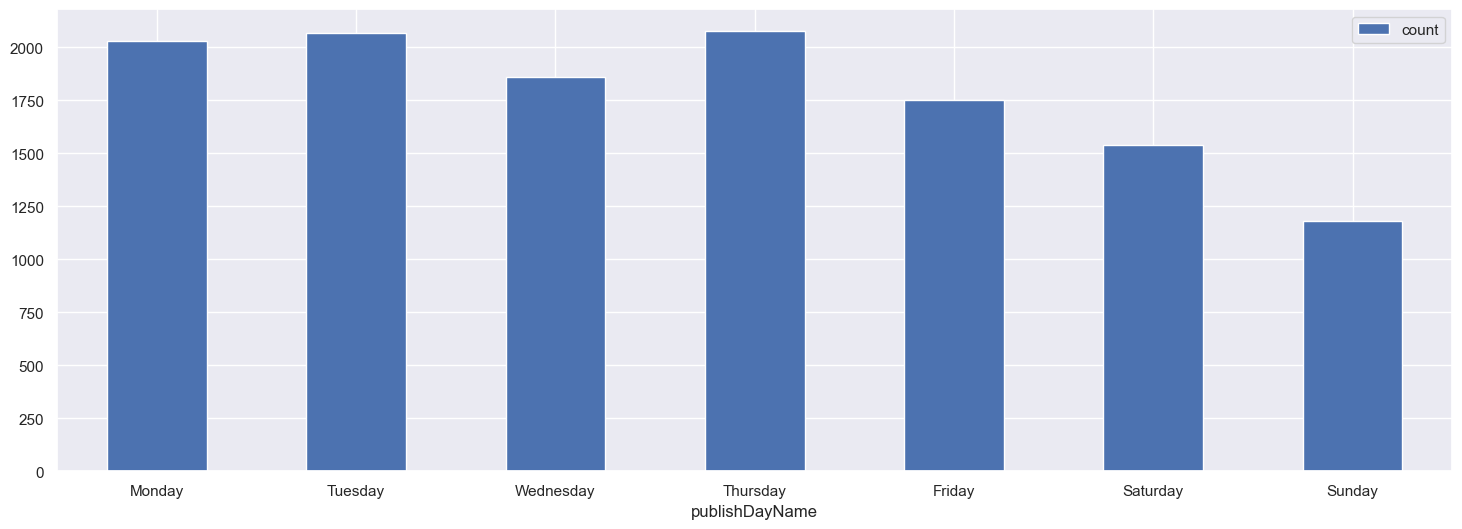

In [25]:
day_df = pd.DataFrame(video_df['publishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
# Use 'pushblishDayName' as x and 'count' as y
ax = day_df.reset_index().plot.bar(x='publishDayName', y='count', rot=0)

In [26]:
stop_words = set(stopwords.words('english'))
comments_df['comments_no_stopwords'] = comments_df['comment'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in comments_df['comments_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

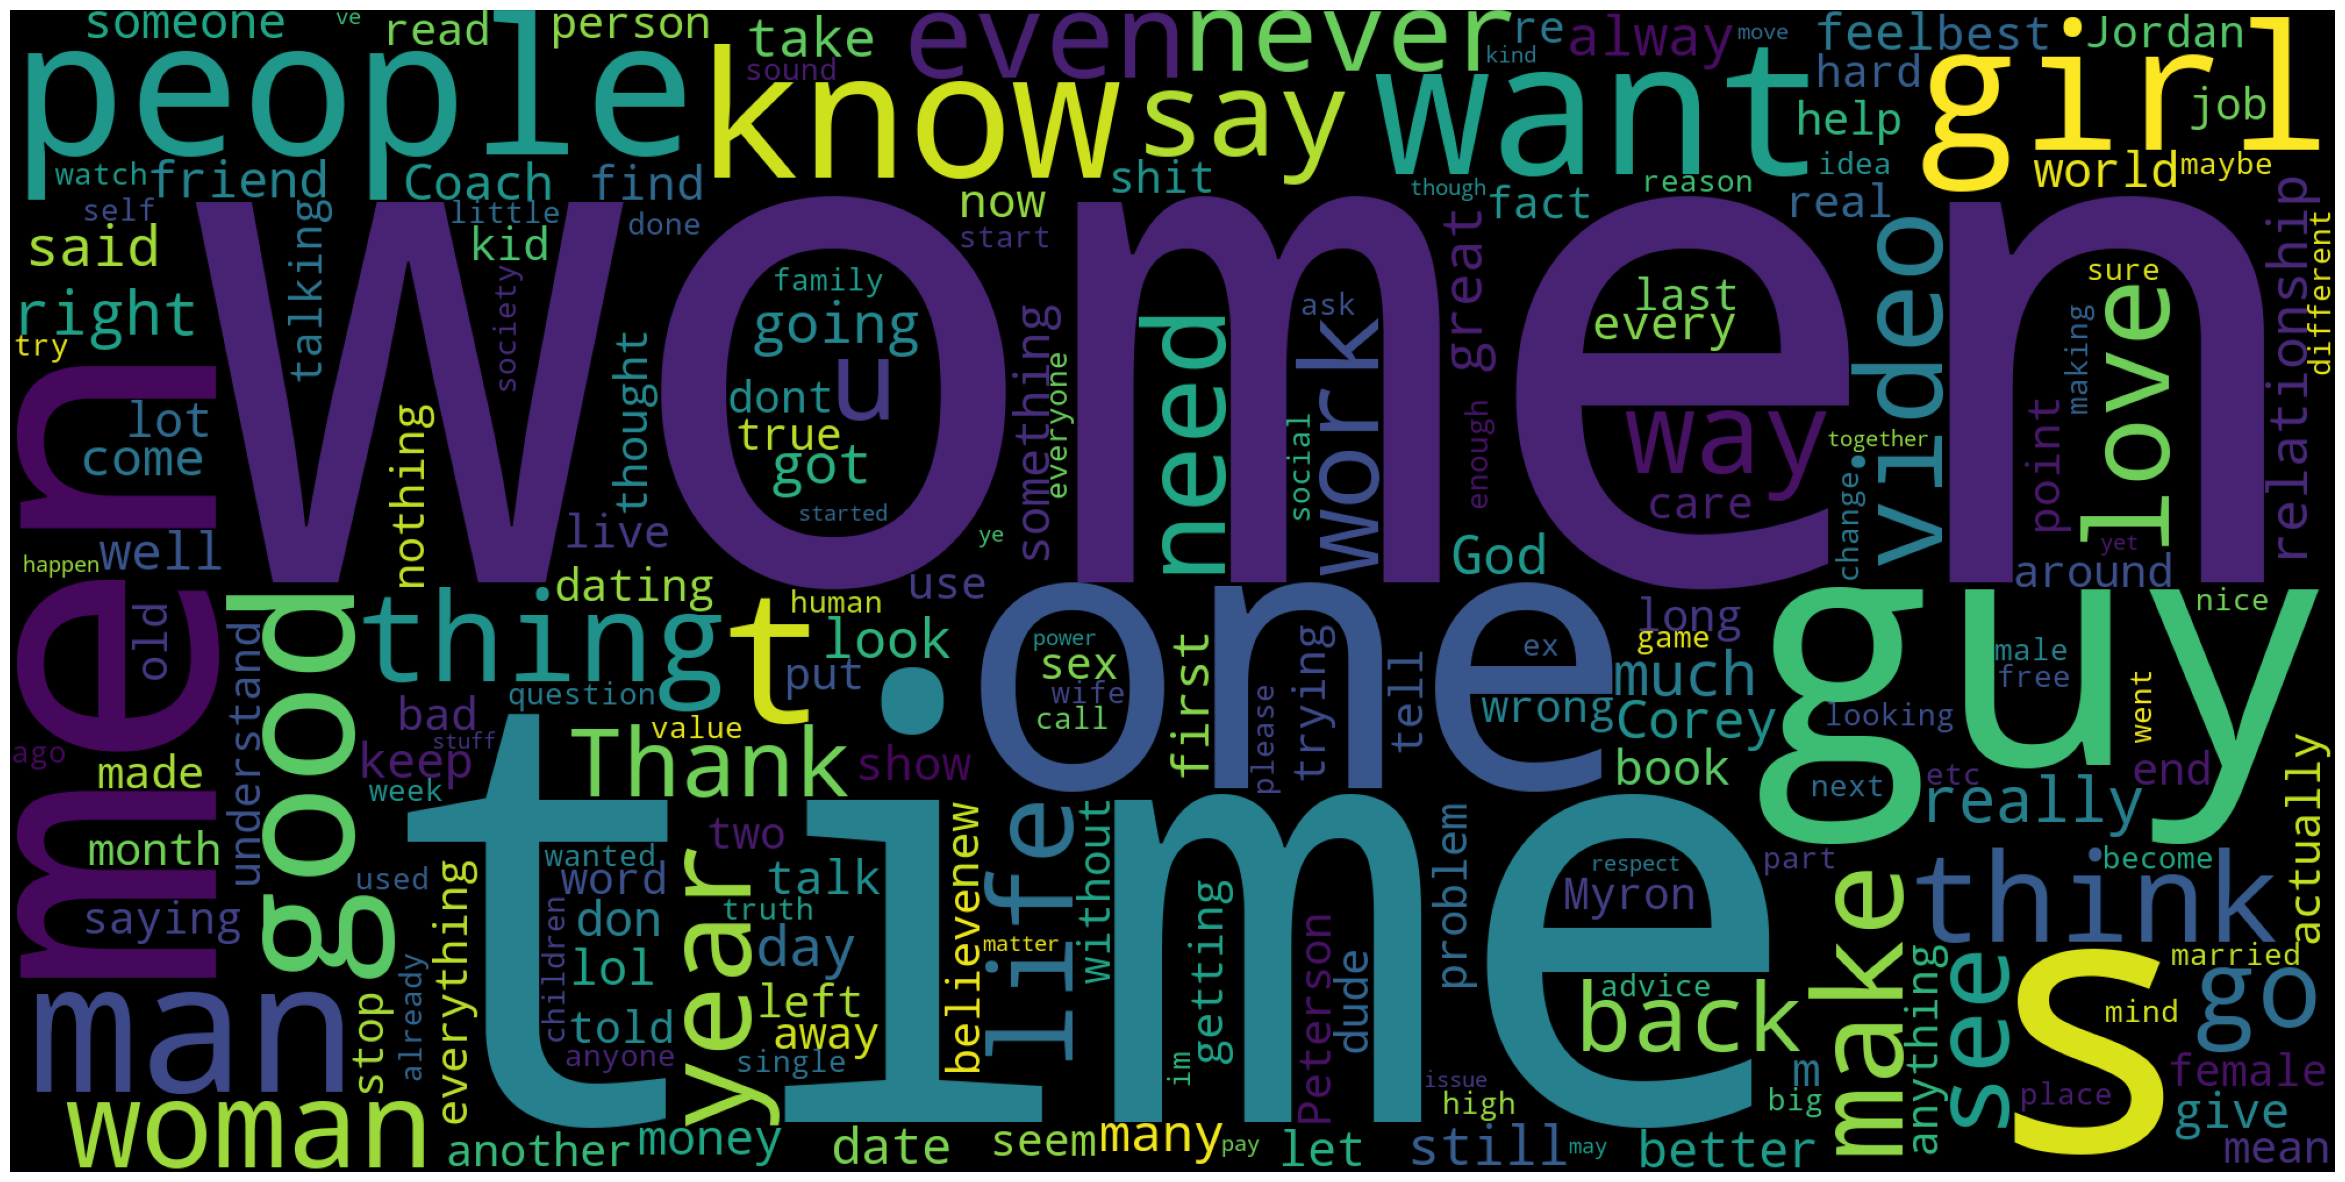

In [27]:
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)